In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
data['exports']= (data['exports']*data['gdpp'])/100
data['health']= (data['health']*data['gdpp'])/100
data['imports']= (data['imports']*data['gdpp'])/100
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,305.809,231.803222,1373.08241,1610,9.44,56.2,5.82,553
1,Albania,16.6,46838.680,10956.905500,81298.56600,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,76383.744,8294.797200,62459.62400,12900,16.10,76.5,2.89,4460
3,Angola,119.0,77631.407,3551.356500,53457.26100,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,677222.000,89750.520000,876667.60000,19100,1.44,76.8,2.13,12200


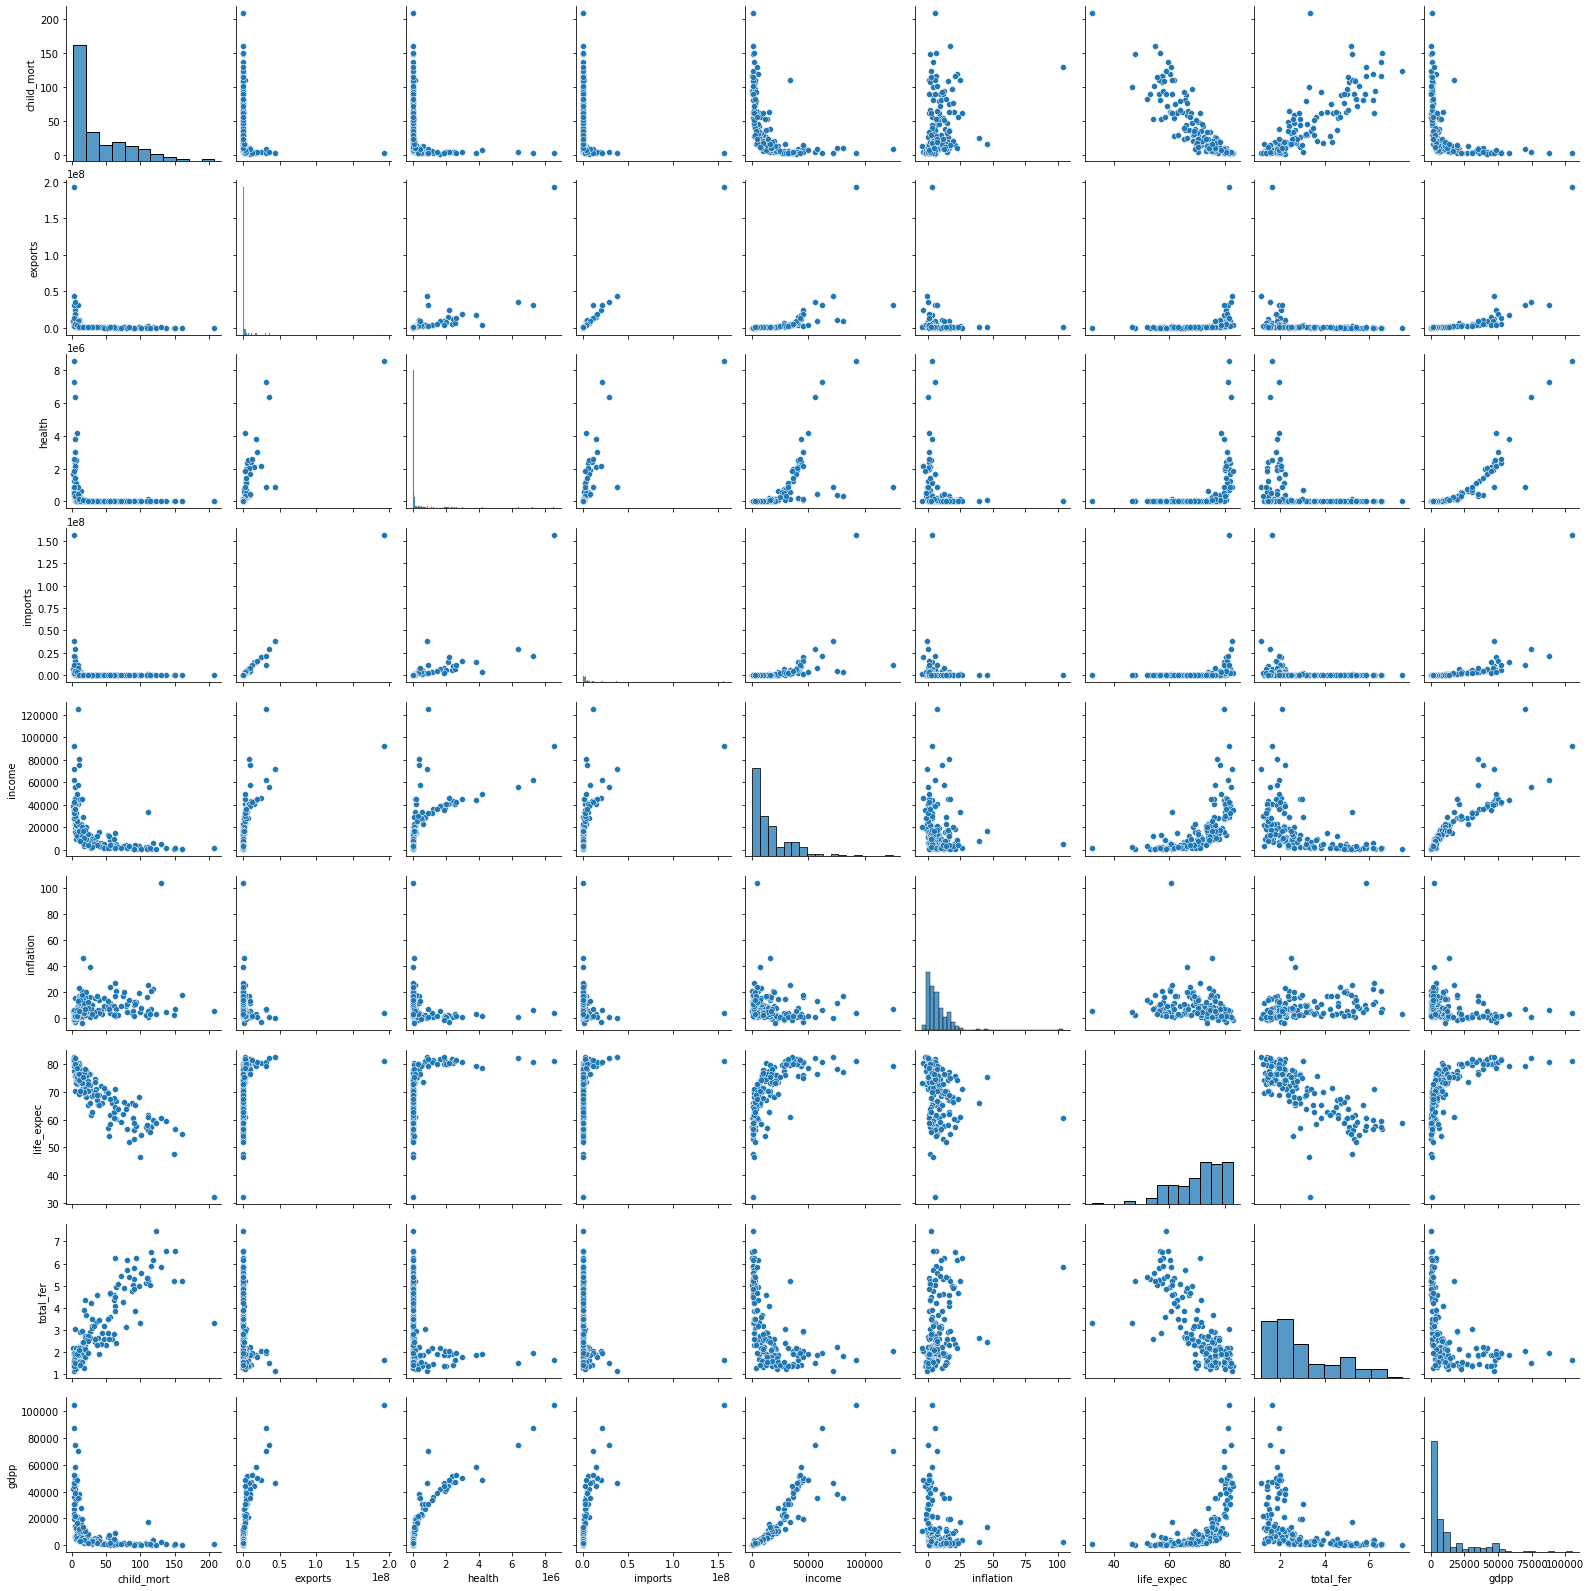

In [9]:
sns.pairplot(data)

In [10]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.179206,-0.301880,-0.184386,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.179206,1.000000,0.727083,0.995620,0.562889,-0.091578,0.242719,-0.173418,0.654605
health,-0.301880,0.727083,1.000000,0.734767,0.638889,-0.184217,0.406650,-0.280754,0.882398
imports,-0.184386,0.995620,0.734767,1.000000,0.532794,-0.103465,0.248874,-0.180457,0.647965
income,-0.524315,0.562889,0.638889,0.532794,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.091578,-0.184217,-0.103465,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.242719,0.406650,0.248874,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.173418,-0.280754,-0.180457,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.654605,0.882398,0.647965,0.895571,-0.221631,0.600089,-0.454910,1.000000


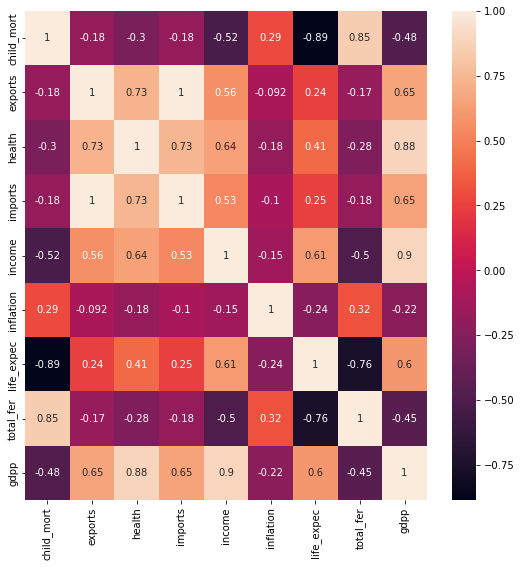

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data1.iloc[:,1:])

In [15]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

C:\Users\NIJU\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1503.0000000000002, 1034.0218437620156, 698.6191254397777, 442.8278922795074, 363.57353461653474, 311.9243207214797, 267.56290475062116, 236.7960322702365, 213.40808252897193, 188.10656056710616]


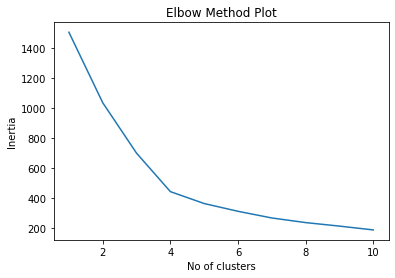

In [19]:
plt.plot(ks,inertia)
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_data) 
print(y_kmeans)

[0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 2 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0]


In [25]:
#Checking the efficiency of the model by Silhoutte score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_data,kmeans.labels_, metric='euclidean',random_state=42)
print('Silhouette Score:', sil_score)

Silhouette Score: 0.3713974322894772


# Heirachical Agglomerative clustering

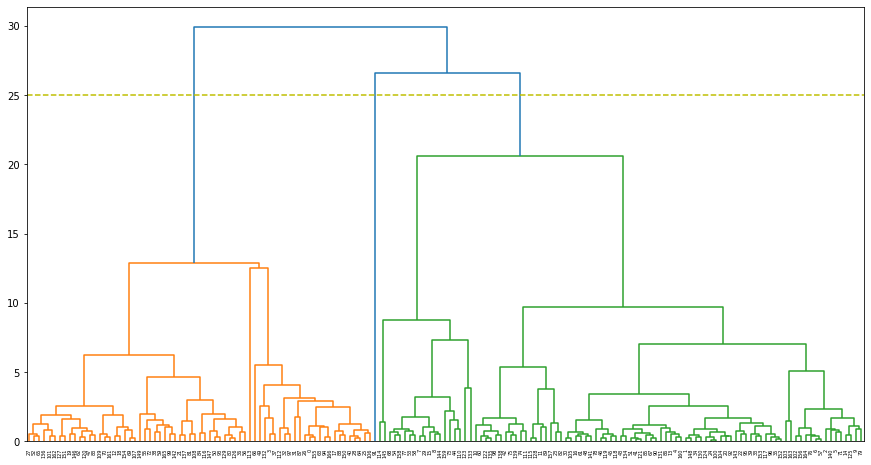

In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage
denlink=linkage(scaled_data,method='ward')
plt.figure(figsize=(15,8))
dendrogram(denlink,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(25,0,5000,colors='y',linestyles='dashed' )
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(scaled_data)
labels


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [32]:
from sklearn.metrics import silhouette_score

sil_score2 = silhouette_score(scaled_data,labels,metric='euclidean',random_state=42)

In [33]:
from sklearn.metrics import silhouette_score

sil_score2 = silhouette_score(scaled_data,labels,metric='euclidean',random_state=42)

print('Silhouette Score: ' ,sil_score2)

Silhouette Score:  0.3670362327742886


In [35]:
data['cluster_no']=kmeans.labels_
data['cluster_no']=kmeans.labels_
data.head(11)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,Afghanistan,90.2,3.058090e+02,2.318032e+02,1.373082e+03,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,4.683868e+04,1.095691e+04,8.129857e+04,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,7.638374e+04,8.294797e+03,6.245962e+04,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,7.763141e+04,3.551357e+03,5.345726e+04,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,6.772220e+05,8.975052e+04,8.766676e+05,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,2.005101e+05,8.593290e+04,1.697440e+05,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,2.156627e+04,4.562096e+03,4.696885e+04,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,5.333348e+06,2.351522e+06,5.629645e+06,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,1.128400e+07,2.419571e+06,1.051414e+07,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,1.851934e+05,2.005409e+04,7.059859e+04,16000,13.800,69.1,1.92,5840,1


In [36]:
df1_new =  data.groupby(['cluster_no']).mean()
df1_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_no,,,,,,,,,
0,75.524638,6.170595e+04,5.526823e+03,4.912817e+04,4272.652174,10.999203,61.959420,4.388551,2005.420290
1,12.135052,3.958196e+06,6.615283e+05,3.305902e+06,25532.474227,5.536093,76.559794,1.936804,19810.721649
2,2.800000,1.929375e+08,8.566425e+06,1.565550e+08,91700.000000,3.620000,81.300000,1.630000,105000.000000


In [38]:
df1_new['No of countries']=data.groupby('cluster_no')['country'].count()
df1_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,No of countries
cluster_no,,,,,,,,,,
0,75.524638,6.170595e+04,5.526823e+03,4.912817e+04,4272.652174,10.999203,61.959420,4.388551,2005.420290,69
1,12.135052,3.958196e+06,6.615283e+05,3.305902e+06,25532.474227,5.536093,76.559794,1.936804,19810.721649,97
2,2.800000,1.929375e+08,8.566425e+06,1.565550e+08,91700.000000,3.620000,81.300000,1.630000,105000.000000,1


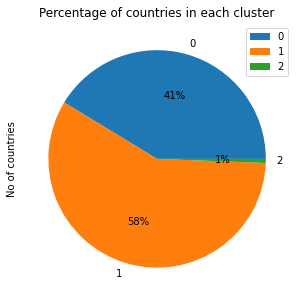

In [39]:
df1_new.plot.pie(y='No of countries', figsize=(5,5),autopct='%1.0f%%',title='Percentage of countries in each cluster')
plt.show()

In [41]:
cluster0=data[data['cluster_no']==0]
cluster0.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
26,Burundi,93.6,4.759801e+01,61.898760,2.091751e+02,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,2.042344e+02,126.176220,9.901625e+02,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,4.584952e+02,88.240796,5.533178e+02,609,20.80,57.5,6.54,334,0
112,Niger,123.0,2.688509e+02,62.489664,5.946206e+02,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,2.674577e+02,208.553310,5.492435e+02,1220,17.20,55.0,5.20,399,0
...,...,...,...,...,...,...,...,...,...,...,...
108,Namibia,56.0,1.287546e+05,18262.675800,1.635021e+05,8460,3.56,58.6,3.60,5190,0
21,Botswana,52.5,1.758061e+05,33467.675000,2.068544e+05,13300,8.92,57.1,2.88,6350,0
137,South Africa,53.7,1.515754e+05,47380.569600,1.452156e+05,12000,6.35,54.3,2.59,7280,0
55,Gabon,63.7,4.417656e+05,26796.875000,1.447031e+05,15400,16.60,62.9,4.08,8750,0


In [42]:
cluster0=data[data['cluster_no']==0]
cluster0.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
26,Burundi,93.6,47.598012,61.898760,209.17512,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,204.234390,126.176220,990.16254,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,458.495160,88.240796,553.31776,609,20.80,57.5,6.54,334,0
112,Niger,123.0,268.850880,62.489664,594.62064,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,267.457680,208.553310,549.24345,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,426.422500,64.304513,733.44670,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,553.017150,91.467281,811.09182,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,234.720880,79.168568,527.12740,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,480.352680,138.838779,735.27669,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,111.283196,61.798184,541.31492,1420,11.60,61.7,4.61,482,0


Top 10 Countries obtained from Hierarchical clustering.

The above mentioned are the countries that are in the need of fiancial aid.